In [29]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

import sys
sys.path.insert(1, 'E:\KSIP\LatentFingerPrintEnhancement\source')
from utilities import *
from fft import * 

In [30]:
def getGaussianKernel2D(ksize,sigmaX,sigmaY):
    if not type(ksize) == tuple:
        print("Ksize is",type(ksize),"is not Tuple.")
        return None 
    else:        
        gaussian_x = cv.getGaussianKernel(ksize[0],sigmaX)
        gaussian_y = cv.getGaussianKernel(ksize[1],sigmaY)
        return gaussian_x * gaussian_y.T

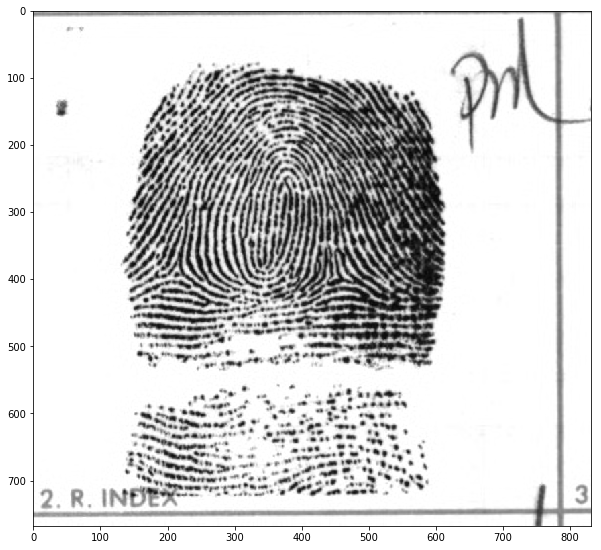

In [56]:
gray = cv.imread(r"E:\KSIP\LatentFingerPrintEnhancement\images\F0000032.png",0)
plt.figure(figsize=(10,10))
plt.imshow(gray,cmap='gray')

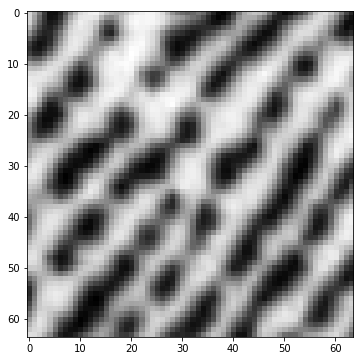

In [71]:
roi = gray[122:122+64,230:230+64]
plt.figure(figsize=(6,6))
plt.imshow(roi,cmap='gray')

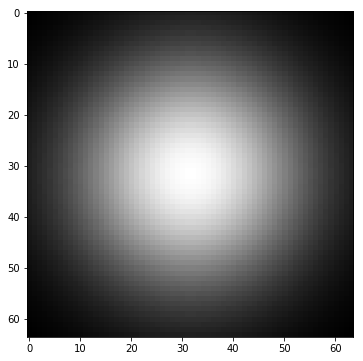

In [80]:
g = normalize(getGaussianKernel2D((64,64),16,16))
plt.figure(figsize=(6,6))
plt.imshow(g,cmap='gray')

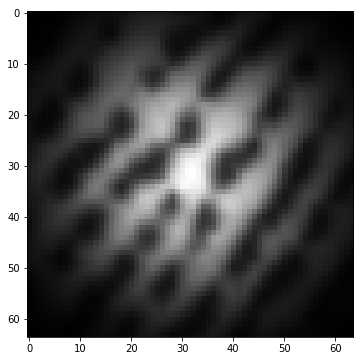

In [88]:
roi_gaun = normalize(roi/255*g)
plt.figure(figsize=(6,6))
plt.imshow(roi_gaun,cmap='gray')

## Spectrum magnitude of original image

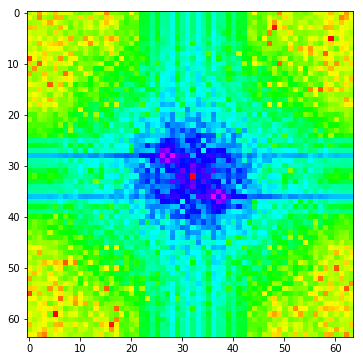

In [89]:
spectrum = spatial2freq(roi)
magnitude = get_magnitude(spectrum)
magnitude = normalize(to_logscale(magnitude))   

plt.figure(figsize=(6,6))
plt.imshow(magnitude.copy(),cmap="hsv")

## Spectrum magnitude of original image

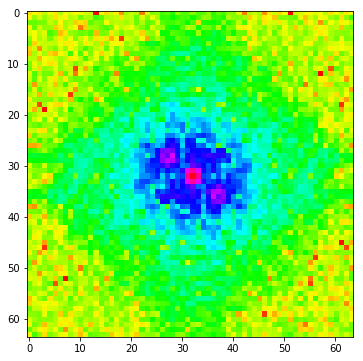

In [87]:
spectrum = spatial2freq(roi_gaun)
magnitude = get_magnitude(spectrum)
magnitude = normalize(to_logscale(magnitude))   

plt.figure(figsize=(6,6))
plt.imshow(magnitude.copy(),cmap="hsv")